# RatInABox: Code for replicating figures in the GitHub readme

In [1]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

%load_ext autoreload
%autoreload 2

from tqdm import tqdm

In [5]:
#Leave this as False. 
#For paper/readme production I use a plotting library (tomplotlib) to format and save figures. Without this they will still show but not save. 
if False: 
    import tomplotlib.tomplotlib as tpl
    tpl.figureDirectory = "../figures/"
    tpl.setColorscheme(colorscheme=2)
    save_plots = True
    from matplotlib import rcParams, rc
    rcParams['figure.dpi']= 300
else:
    save_plots = False

## Main animation figure stuff

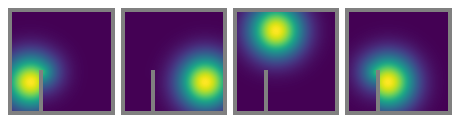

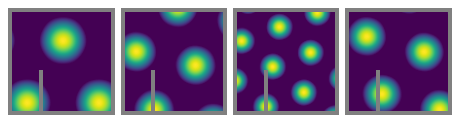

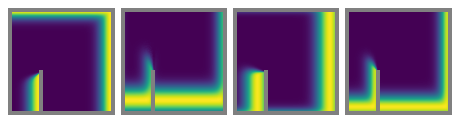

In [3]:
#Initialise 2D environment and agent
Env = Environment()
Env.add_wall(np.array([[0.3,0.0],[0.3,0.4]]))

Ag = Agent(Env)
Ag.pos=np.array([0.5,0.5])
Ag.dt = 50e-3
Ag.speed_mean = 0.16
Ag.rotational_velocity_coherence_time = 0.3

#Initialise neuronal populations
PCs = PlaceCells(Ag,
                 params={'n':4,
                         'widths':0.18,
                         'color':'C1',})
PCs.place_cell_centres = np.array([[0.2,0.3],[0.8,0.3],[0.4,0.8],[0.4,0.3]])
# np.random.shuffle(PCs.place_cell_centres)

GCs = GridCells(Ag,
                params={'n':4,
                        'color':'C2',})

BVCs = BoundaryVectorCells(Ag,
                params={'n':4,
                        'color':'C3',})




fig, ax = PCs.plot_rate_map(spikes=False)
if save_plots == True: tpl.saveFigure(fig,"pcs")
fig, ax = GCs.plot_rate_map(spikes=False)
if save_plots == True: tpl.saveFigure(fig,"gcs")
fig, ax = BVCs.plot_rate_map(spikes=False)
if save_plots == True: tpl.saveFigure(fig,"bvcs")


100%|██████████| 1200/1200 [00:01<00:00, 759.51it/s]


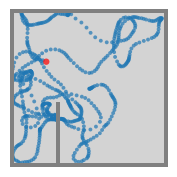

In [4]:
train_time = 60
for i in tqdm(range(int(train_time/Ag.dt))): 
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()

fig, ax = Ag.plot_trajectory(t_end=60)


In [5]:
if save_plots == True: 
    anim = Ag.animate_trajectory(t_end=60,speed_up=2)
    anim.save("../figures/animations/trajectory.mp4",dpi=250)

In [6]:
if save_plots == True: 
    anim = PCs.animate_rate_timeseries(t_end=60,speed_up=2)
    anim.save("../figures/animations/pcs.mp4",dpi=250)
    print("pcs")

if save_plots == True: 
    anim = GCs.animate_rate_timeseries(t_end=60,speed_up=2)
    anim.save("../figures/animations/gcs.mp4",dpi=250)
    print("gcs")

if save_plots == True: 
    anim = BVCs.animate_rate_timeseries(t_end=60,speed_up=2)
    anim.save("../figures/animations/bvcs.mp4",dpi=250)
    print("bvcs")


## Multi environments figure stuff 

100%|██████████| 500/500 [00:01<00:00, 272.42it/s]


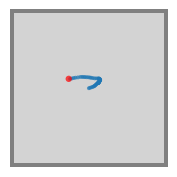

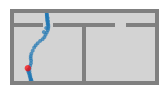

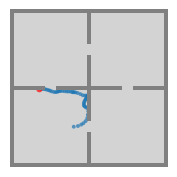

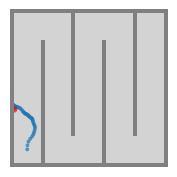

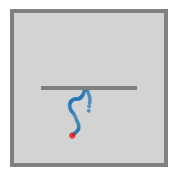

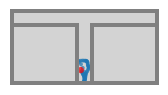

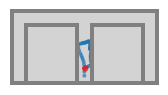

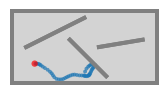

In [7]:
Env1 = Environment()
Ag1 = Agent(Env1)
Ag1.pos = np.array([0.5,0.5])


Env2 = Environment(params={'aspect':2,
                            'scale':0.5})                    
Env2.add_wall([[0.5,0],[0.5,0.4]])
Env2.add_wall([[0,0.4],[0.2,0.4]])
Env2.add_wall([[0.3,0.4],[0.7,0.4]])
Env2.add_wall([[0.8,0.4],[1,0.4]])
Ag2 = Agent(Env2)
Ag2.pos = np.array([0.22,0.35])
Ag2.velocity = 0.3*np.array([0.5,1])

Env3 = Environment()
Env3.add_wall([[0,0.5],[0.2,0.5]])
Env3.add_wall([[0.3,0.5],[0.7,0.5]])
Env3.add_wall([[0.8,0.5],[1,0.5]])
Env3.add_wall([[0.5,0],[0.5,0.2]])
Env3.add_wall([[0.5,0.3],[0.5,0.7]])
Env3.add_wall([[0.5,0.8],[0.5,1]])
Ag3 = Agent(Env3)
Ag3.pos = np.array([0.4,0.25])
Ag3.velocity = 0.3*np.array([1,0])


Env4 = Environment()
Env4.add_wall([[0.2,0],[0.2,0.8]])
Env4.add_wall([[0.4,1],[0.4,0.2]])
Env4.add_wall([[0.6,0],[0.6,0.8]])
Env4.add_wall([[0.8,1],[0.8,0.2]])
Ag4 = Agent(Env4)
Ag4.pos = np.array([0.1,0.1])
Ag4.velocity = 0.3*np.array([0,1])


Env5 = Environment()
Env5.add_wall([[0.2,0.5],[0.8,0.5]])
Ag5 = Agent(Env5)
Ag5.pos = np.array([0.5,0.35])
Ag5.velocity = 0.3*np.array([0,1])

Env6 = Environment(params={'aspect':2,
                            'scale':0.5})
Env6.add_wall([[0.45,0],[0.45,0.4]])
Env6.add_wall([[0.45,0.4],[0,0.4]])
Env6.add_wall([[0.55,0],[0.55,0.4]])
Env6.add_wall([[0.55,0.4],[1,0.4]])
Ag6 = Agent(Env6)
Ag6.pos = np.array([0.5,0.05])
Ag6.velocity = 0.3*np.array([0,1])

Env7 = Environment(params={'aspect':2,
                            'scale':0.5})
Env7.add_wall([[0.45,0],[0.45,0.4]])
Env7.add_wall([[0.45,0.4],[0.1,0.4]])
Env7.add_wall([[0.1,0.4],[0.1,0]])

Env7.add_wall([[0.55,0],[0.55,0.4]])
Env7.add_wall([[0.55,0.4],[0.9,0.4]])
Env7.add_wall([[0.9,0.4],[0.9,0]])
Ag7 = Agent(Env7)
Ag7.pos = np.array([0.5,0.05])
Ag7.velocity = 0.3*np.array([0,1])

Env8 = Environment(params={'aspect':2,
                            'scale':0.5})
Env8.add_wall([[0.1,0.25],[0.5,0.45]])
Env8.add_wall([[0.4,0.3],[0.65,0.05]])
Env8.add_wall([[0.6,0.25],[0.9,0.3]])

Ag8 = Agent(Env8)
Ag8.pos = np.array([0.5,0.05])
Ag8.velocity = 0.3*np.array([0,1])


train_time = 5
for i in tqdm(range(int(train_time/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()
    Ag4.update()
    Ag5.update()
    Ag6.update()
    Ag7.update()
    Ag8.update()


fig1,ax1=Ag1.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig1,'oneroom')

fig2,ax2=Ag2.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig2,'tworoom')

fig3,ax3=Ag3.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig3,'fourroom')

fig4,ax4=Ag4.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig4,'hairpin')

fig5,ax5=Ag5.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig5,'barrier')

fig6,ax6=Ag6.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig6,'tmaze')

fig7,ax7=Ag7.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig7,'wmaze')

fig8,ax8=Ag8.plot_trajectory(t_end=5)
if save_plots == True: tpl.saveFigure(fig8,'dunno')

## Boundary conditions

100%|██████████| 300/300 [00:00<00:00, 3486.62it/s]


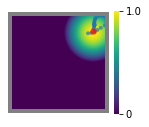

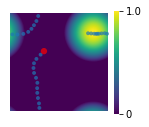

In [8]:
Env_s = Environment()
Ag_s = Agent(Env_s)
Ag_s.speed_mean = 0.3
PC_s = PlaceCells(Ag_s,params={
                     'description':'gaussian_threshold',
                     'n':1,
                     'widths':0.3,
                     'place_cell_centres':np.array([[0.85,0.8]])})
train_time = 3
Ag_s.pos = np.array([0.8,0.8])
Ag_s.velocity = Ag_s.speed_mean*np.array([1,0])
for i in tqdm(range(int(train_time/Ag_s.dt))): 
    Ag_s.update()
    PC_s.update()
fig, ax = PC_s.plot_rate_map(chosen_neurons='all')
fig, ax = Ag_s.plot_trajectory(fig=fig, ax=ax[0])
if save_plots == True: tpl.saveFigure(fig,'solid')

Env_p = Environment(params={'boundary_conditions':'periodic'})
Ag_p = Agent(Env_p)
Ag_p.speed_mean = 0.3
PC_p = PlaceCells(Ag_p,params={
                     'widths':0.3,
                     'description':'gaussian_threshold',
                     'n':1,
                     'wall_geometry':'euclidean',
                     'place_cell_centres':np.array([[0.85,0.8]])})
train_time = 3
Ag_p.pos = np.array([0.8,0.8])
Ag_p.velocity = Ag_s.speed_mean*np.array([1,0])
for i in tqdm(range(int(train_time/Ag_p.dt))): 
    Ag_p.update()
    PC_p.update()
fig, ax = PC_p.plot_rate_map(chosen_neurons='all')
fig, ax = Ag_p.plot_trajectory(fig=fig, ax=ax[0])
if save_plots == True: tpl.saveFigure(fig,'periodic')

## One dimensional figure

100%|██████████| 6000/6000 [00:00<00:00, 11305.12it/s]


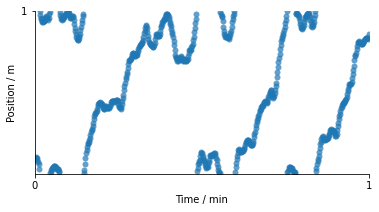

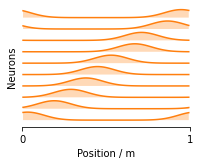

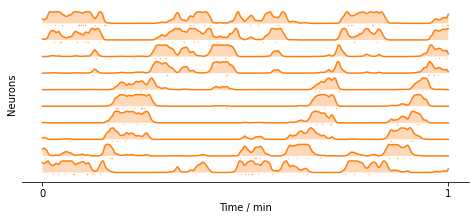

In [9]:
Env = Environment(
        params = {'dimensionality':'1D',
                  'boundary_conditions':'periodic'})
Ag = Agent(Env,
        params = {'speed_mean':0.05,
                  'speed_std':0.15})
PCs = PlaceCells(Ag,
    params = {'cell_class':'place_cell',
              'widths':0.1}
)
for i in tqdm(range(int(60/Ag.dt))): 
    Ag.update()
    PCs.update()

fig, ax = Ag.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,'1dtraj')
fig, ax = PCs.plot_rate_map(spikes=False)
if save_plots == True: tpl.saveFigure(fig,'1drms')
# PCs.plot_rate_map(plot_spikes=False,by_history=True)
fig, ax = PCs.plot_rate_timeseries(spikes=True)
if save_plots == True: tpl.saveFigure(fig,'1dtimeseries')


## Motion model parameters

100%|██████████| 600/600 [00:00<00:00, 1023.63it/s]


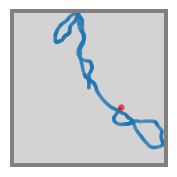

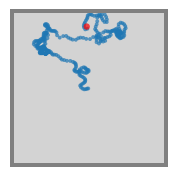

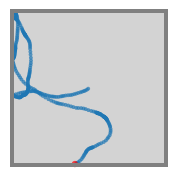

In [10]:
Env = Environment()
Ag1 = Agent(Env,
    params={"dt":0.05,
            })
Ag1.pos = np.array([0.5,0.5])
Ag1.walls_repel = False


Ag2 = Agent(Env,
    params={"rotational_velocity_std":360*np.pi/180, 
            "dt":0.05,})
Ag2.pos = np.array([0.5,0.5])
Ag2.walls_repel = False

Ag3 = Agent(Env,
    params={"rotational_velocity_std":60*np.pi/180, 
            "dt":0.05,})
Ag3.pos = np.array([0.5,0.5])
Ag3.walls_repel = False

for i in tqdm(range(int(30/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()

# Ag.plot_trajectory()
fig, ax = Ag1.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,"ag1")
fig, ax = Ag2.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,"ag2")
fig, ax = Ag3.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,"ag3")

## Policy control 

100%|██████████| 9000/9000 [00:04<00:00, 1988.89it/s]


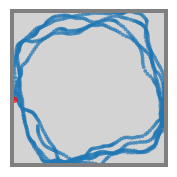

In [11]:
Env = Environment()
Ag = Agent(Env)

for i in tqdm(range(int(1.5*60/Ag.dt))): 
    drift = rotate(Ag.pos-Env.centre,np.pi/2)
    drift = 0.2*drift/np.linalg.norm(drift)
    Ag.update(drift_velocity=drift,drift_to_random_strength_ratio=1)

fig, ax= Ag.plot_trajectory()
if save_plots == True: tpl.saveFigure(fig,"policycontrol")

In [12]:
if save_plots == True: 
    anim = Ag.animate_trajectory(speed_up=3)
    anim.save("../figures/animations/circular_motion.mp4",dpi=250)

## Types of place cell

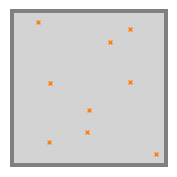

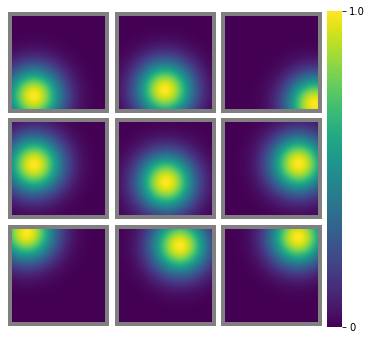

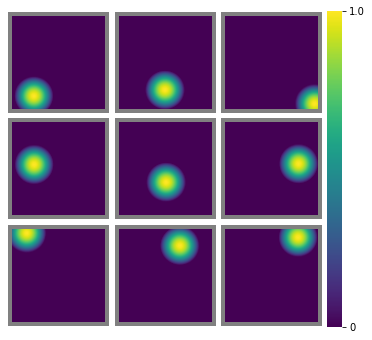

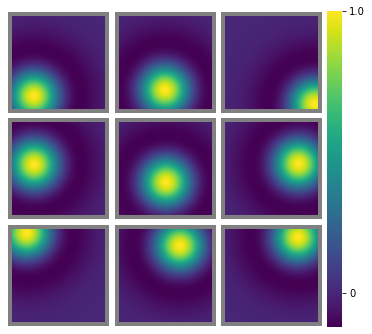

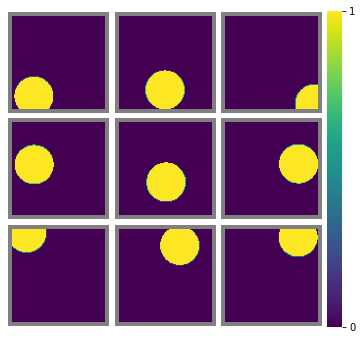

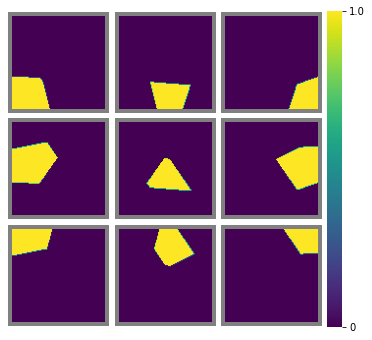

In [13]:
Env = Environment()
Ag = Agent(Env)
locs = Env.sample_positions(n=9)
PC_g = PlaceCells(Ag,params={"n":9,"description":"gaussian","place_cell_centres":locs})
PC_gt = PlaceCells(Ag,params={"n":9,"description":"gaussian_threshold","place_cell_centres":locs})
PC_dog = PlaceCells(Ag,params={"n":9,"description":"diff_of_gaussians","place_cell_centres":locs})
PC_th = PlaceCells(Ag,params={"n":9,"description":"top_hat","place_cell_centres":locs})
PC_oh = PlaceCells(Ag,params={"n":9,"description":"one_hot","place_cell_centres":locs})

fig, ax = PC_g.plot_place_cell_locations()
fig0, ax0 = PC_g.plot_rate_map(shape=(3,3))
fig1, ax1 = PC_gt.plot_rate_map(shape=(3,3))
fig2, ax2 = PC_dog.plot_rate_map(shape=(3,3))
fig3, ax3 = PC_th.plot_rate_map(shape=(3,3))
fig4, ax4 = PC_oh.plot_rate_map(shape=(3,3))

if save_plots == True: 
    tpl.saveFigure(fig,"placecelllocations")
    tpl.saveFigure(fig0,"PC_g")
    tpl.saveFigure(fig1,"PC_gt")
    tpl.saveFigure(fig2,"PC_dog")
    tpl.saveFigure(fig3,"PC_th")
    tpl.saveFigure(fig4,"PC_oh")



## Place cell geometry

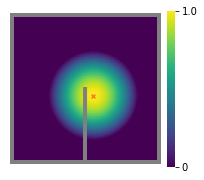

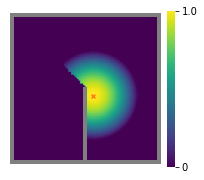

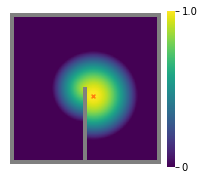

In [14]:
Env = Environment()
Env.add_wall([[0.5,0],[0.5,0.5]])
Ag = Agent(Env)
N1 = PlaceCells(Ag,
    params={'place_cell_centres':np.array([[0.55,0.45]]),
            'wall_geometry':'euclidean',
            'description':'gaussian_threshold',
            'widths':0.3}
)

N2 = PlaceCells(Ag,
    params={'place_cell_centres':np.array([[0.55,0.45]]),
            'wall_geometry':'line_of_sight',
            'description':'gaussian_threshold',
            'widths':0.3}
)

N3 = PlaceCells(Ag,
    params={'place_cell_centres':np.array([[0.55,0.45]]),
            'wall_geometry':'geodesic',
            'description':'gaussian_threshold',
            'widths':0.3}
)
fig, ax = N1.plot_place_cell_locations()
fig, ax = N1.plot_rate_map(fig=fig,ax=ax)
if save_plots == True: tpl.saveFigure(fig,'euc')

fig, ax = N2.plot_place_cell_locations()
fig, ax = N2.plot_rate_map(fig=fig,ax=ax)
if save_plots == True: tpl.saveFigure(fig,'los')

fig, ax = N3.plot_place_cell_locations()
fig, ax = N3.plot_rate_map(fig=fig,ax=ax)
if save_plots == True: tpl.saveFigure(fig,'geo')



## Spiking 

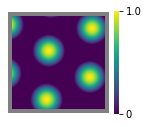

In [3]:
Env = Environment()
Ag = Agent(Env)
Ag.dt = 100e-3
GCs = GridCells(Ag,
    params={'n':1})
fig, ax = GCs.plot_rate_map()

100%|██████████| 24000/24000 [00:12<00:00, 1867.80it/s]


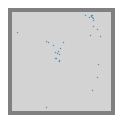

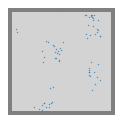

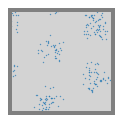

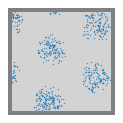

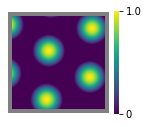

In [6]:
for i in tqdm(range(int(1*60/Ag.dt))): 
    Ag.update()
    GCs.update()
fig, ax = GCs.plot_rate_map(
                method="neither",
                spikes=True)
if save_plots == True: tpl.saveFigure(fig,'1min')

for i in tqdm(range(int(4*60/Ag.dt))): 
    Ag.update()
    GCs.update()
fig, ax = GCs.plot_rate_map(
                method=None,
                spikes=True)
if save_plots == True: tpl.saveFigure(fig,'5min')

for i in tqdm(range(int(15*60/Ag.dt))): 
    Ag.update()
    GCs.update()
fig, ax = GCs.plot_rate_map(
                method=None,
                spikes=True)
if save_plots == True: tpl.saveFigure(fig,'20min')

for i in tqdm(range(int(40*60/Ag.dt))): 
    Ag.update()
    GCs.update()
fig, ax = GCs.plot_rate_map(
                method=None,
                spikes=True)
if save_plots == True: tpl.saveFigure(fig,'60min')

fig, ax = GCs.plot_rate_map(method='groundtruth',spikes=False)
if save_plots == True: tpl.saveFigure(fig,'rfgc')

## Rate maps

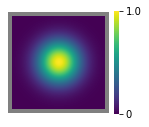

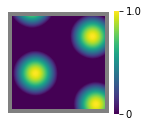

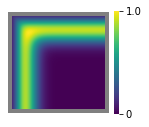

In [7]:
Env = Environment()
Ag = Agent(Env)
Ag.dt = 100e-3

PC = PlaceCells(Ag,
    params={
    'n':1,
    'place_cell_centres':np.array([[0.5,0.5]]),
    'widths':0.15,
    }
)

GC = GridCells(Ag,
    params={'n':1,})
BVC = BoundaryVectorCells(Ag,
    params={'n':1,})
VC = VelocityCells(Ag)

fig, ax = PC.plot_rate_map(by_history=False)
if save_plots == True: tpl.saveFigure(fig,'truepc')
fig, ax = GC.plot_rate_map(by_history=False)
if save_plots == True: tpl.saveFigure(fig,'truegc')
fig, ax = BVC.plot_rate_map(by_history=False)
if save_plots == True: tpl.saveFigure(fig,'truebvc')


100%|██████████| 9000/9000 [00:09<00:00, 905.29it/s]


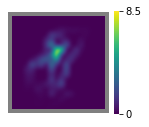

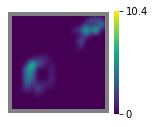

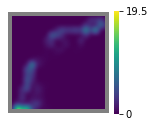

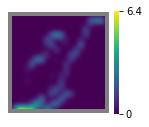

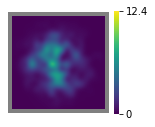

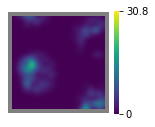

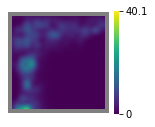

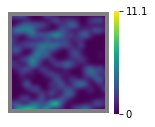

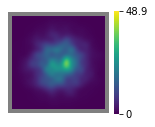

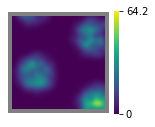

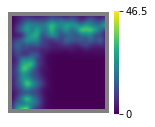

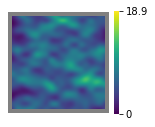

In [8]:
for i in tqdm(range(int(1*60/Ag.dt))): 
    Ag.update()
    PC.update()
    GC.update()
    BVC.update()
    VC.update()
fig, ax = PC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'1minpc')
fig, ax = GC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'1mingc')
fig, ax = BVC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'1minbvc')
fig, ax = VC.plot_rate_map(method='history',chosen_neurons=[0])
if save_plots == True: tpl.saveFigure(fig,'1minvc')

for i in tqdm(range(int(4*60/Ag.dt))): 
    Ag.update()
    PC.update()
    GC.update()
    BVC.update()
    VC.update()
fig, ax = PC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'4minpc')
fig, ax = GC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'4mingc')
fig, ax = BVC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'4minbvc')
fig, ax = VC.plot_rate_map(method='history',chosen_neurons=[0])
if save_plots == True: tpl.saveFigure(fig,'4minvc')

for i in tqdm(range(int(15*60/Ag.dt))): 
    Ag.update()
    PC.update()
    GC.update()
    BVC.update()
    VC.update()
fig, ax = PC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'20minpc')
fig, ax = GC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'20mingc')
fig, ax = BVC.plot_rate_map(method='history')
if save_plots == True: tpl.saveFigure(fig,'20minbvc')
fig, ax = VC.plot_rate_map(method='history',chosen_neurons=[0])
if save_plots == True: tpl.saveFigure(fig,'20minvc')

## Animation figure comparing real data to ratinaboxdata

Attemting to import Sargolini locomotion dataset. 
Please cite Sargolini et al. (2006) DOI:10.1126/science.1125572 if you use this in your work. 
The full dataset (along with many more) can be found here https://www.ntnu.edu/kavli/research/grid-cell-data 
The exact datafile being used is 8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat
/Users/tomgeorge/Documents/RatInABox/ratinabox/data/sargolini.npz
Successfully imported dataset from /Users/tomgeorge/Documents/RatInABox/ratinabox/data/sargolini.npz


100%|██████████| 12000/12000 [00:25<00:00, 474.30it/s]


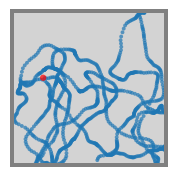

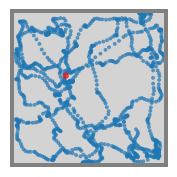

In [9]:
t_start = 0
t_test = 120 

Env_riab = Environment()
Ag_riab = Agent(Env_riab)
Ag_riab.speed_mean = 0.10
Ag_riab.anxiety = 0.5
Ag_riab.t = t_start

Env_sargolini = Environment()
Ag_sargolini = Agent(Env_sargolini)
Ag_sargolini.import_trajectory(dataset='sargolini')
Ag_sargolini.t = t_start

for _ in tqdm(range(int(t_test/Ag_riab.dt))):
    Ag_riab.update()
    Ag_sargolini.update()

fig, ax = Ag_riab.plot_trajectory(t_start=t_start,t_end=t_start+t_test)
if save_plots == True: tpl.saveFigure(fig,'riab_traj')
fig, ax = Ag_sargolini.plot_trajectory(t_start=t_start,t_end=t_start+t_test)
if save_plots == True: tpl.saveFigure(fig,'sargolini_traj')



In [10]:
if save_plots == True: 
    anim = Ag_riab.animate_trajectory(t_end=120,speed_up=2)
    anim.save("../figures/animations/riab_trajectory.mp4",dpi=250)
    print("RiaB animation saved")

    anim = Ag_sargolini.animate_trajectory(t_end=120,speed_up=2)
    anim.save("../figures/animations/sargolini_trajectory.mp4",dpi=250)
    print("Sargolini animation saved")

